# Beam Problem solution in finite differences

We will solve the beam problem using a simple finite differences scheme. Let the deflection of a beam be given by the fourth order differential equation

$$
u^{(4)} = -\alpha
$$

We seek a solution with boundary conditions:

1. Vertically fixed at $x=0$: $u(x=0) = 0$
2. Horizontally fixed at $x=0$: $\partial_x u(x=0) = 0$
3. No strain at $x=1$: $\partial^2_x(x=1) = 0$
4. Smoothness of strain at $x=1$: $\partial^3_x(x=1) = 0$

## Simulation parameters

We first define some parameters for the simulation

In [49]:
alpha = 1 # The normalised body force
N = 1000    # Number of grid points

dx = 1.0/(N-1); # grid-spacing

## Assemble matrix and vector

Lets first assemble equations for the interior of the domain. Because we deal with a fourth order differential equation, we need to use at least a five-point stencil. The simplest stencil is the central difference:

$$
\Delta^4 = [\begin{matrix}1&-4&6&-4&1\end{matrix}]
$$

Note that this stencil goes two points to the right and two points to the left. So we need to come up with something else for the first **two** and last **two** points of the domain. But first lets define equations for the interior:

In [50]:
import numpy as np # Numpy is a very handy library for sintific computations in python.

A = np.zeros((N,N)); # Create matrix with lots of zeros for each point of the domain
f = np.zeros(N); # Create vector to hold the right-hand sides

for i in range(2,N-2): 
    A[i,i-2] = 1.0;
    A[i,i-1] = -4.0;
    A[i,i] = 6.0;
    A[i,i+1] = -4.0;
    A[i,i+2] = 1.0;
A

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -4.,  6., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  6., -4.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

The right-hand side is equalt to alpha within the interior

In [51]:
for i in range(2,N-2):
    f[i] = -alpha*dx**4;

## Boundary conditions

In [52]:
# Dirichlet boundary condition for x=0 (u(0) = 0)
A[0,0] = 1;
f[0] = 0;

# Neumann boundary condition fox x = 0 (du/dx(0) = 0)
A[1,0:2] = [1,-1];
f[1] = 0

# Neumann boundary condition for x = 1 (d2u/dx2(1) = 0)
A[N-2,N-3:N] = [1, -2, 1];
f[N-2] = 0;

# Neumann boundary condition for x = 1 (d3u/dx3(1) = 0)
A[N-1,N-4:N] = [-1, 3, -3,1];
f[N-1] = 0;

In [53]:
A

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 1., -4.,  6., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  6., -4.,  1.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  3., -3.,  1.]])

## Solve the system of equations

In [54]:
from numpy.linalg import solve

u = solve(A,f)

## Analytical solution

In [55]:
x_ref = np.linspace(0,1,30)

u_ref = -alpha*x_ref**2 * (1.0/4.0 - x_ref/6.0 + x_ref**2/24.0)

## Plot solutions

<IPython.core.display.Javascript object>


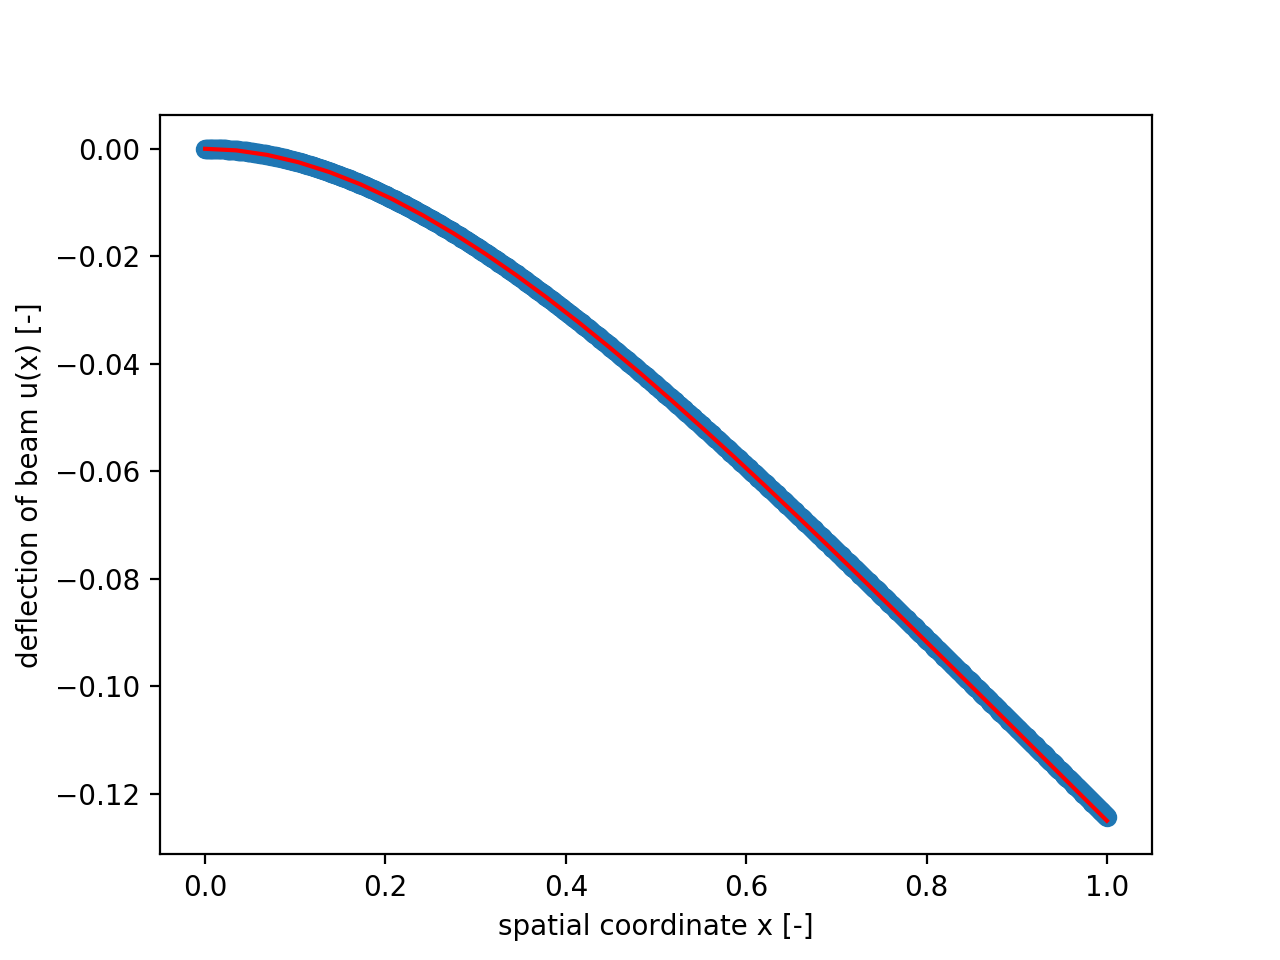

In [56]:
%matplotlib notebook
import matplotlib.pyplot as plt

x = np.linspace(0,1,N)

plt.xlabel('spatial coordinate x [-]')
plt.ylabel('deflection of beam u(x) [-]')
plt.plot(x,u,'o-')
plt.plot(x_ref,u_ref,'r-')
